In [1]:
# -------------------------------------------------------------------------------------------------------- #

prnfile = "/home/isabel/Dropbox/Proyectos/Externos/Luis/PS.prn";

using Plots
using StatsBase

f = open( prnfile ); data = readlines( f );

data = replace.( data, "\t" => " " ); data = replace.( data, "time " => "" );
data = split.( data, " " ); data = hcat( data... );
data = parse.( Float64, data ); data = Array( data' );

times = data[ :, 1 ]; nchs = size( data, 2 ) - 1; channels = data[ :, 2:7 ];

fs = length( times )/( maximum( times ) - minimum( times ) );

# -------------------------------------------------------------------------------------------------------- #

In [2]:
# Graficar todos los posibles puntos, valores y pendientes que se puedan reportar, 
# incluyendo separacion de cachitos de registro

In [3]:
function ms2frames( time::Real, SamplingRate::Real )
    if time  != 0
        x = ceil( Int, ( time * SamplingRate ) / 1000 );
    else
        x = 1
    end
    return x
end

ms2frames (generic function with 1 method)

In [84]:
i = 4;
sweep = channels[ :, i ];

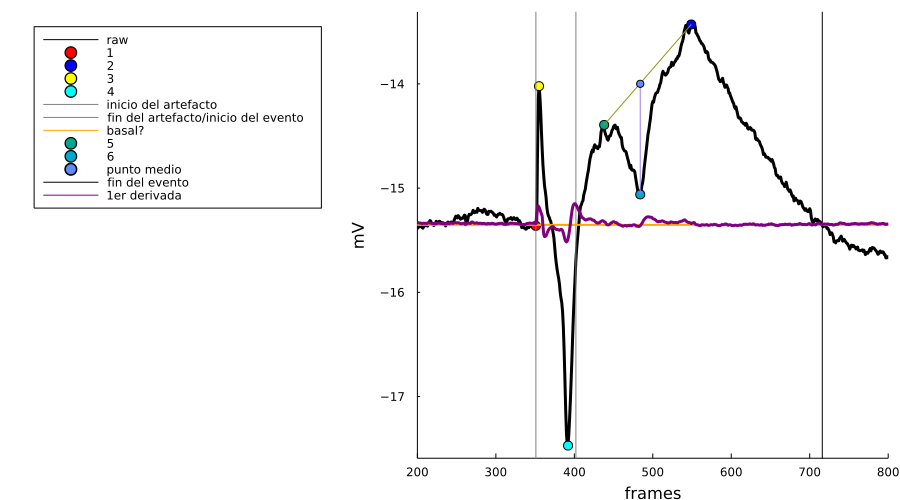

In [102]:
permission = 1
#while permission == 1
PLOT = plot( 
    sweep, 
    line = 3,
    lab = "raw", 
    wsize = ( 900, 500 ), 
    xlims = ( 200, 800 ), 
    c = :black, 
    grid = :false, 
    ylabel = "mV",
    xlabel = "frames");

y1 = maximum( diff( sweep ) );
x1 = findall( diff( sweep ) .== y1 )[ 1 ] - 1;
y1 = sweep[ x1 ];
scatter!( ( x1, y1 ), marker = ( :circle, 5 ), c = :red, lab = "1" );

y2 = maximum( sweep );
x2 = findall( sweep .== y2 )[ 1 ];
scatter!( ( x2, y2 ), marker = ( :circle, 5 ), c = :blue, lab = "2" );

segmento1 = sweep[ x1 : x1 + ms2frames( 1, fs ) ];
y3 = maximum( segmento1 );
x3 = x1 + findall( segmento1 .== y3 )[ 1 ] - 1;
scatter!( ( x3, y3 ), marker = ( :circle, 5 ), c = :yellow, lab = "3" )

segmento2 = sweep[ x1 + ms2frames( 1, fs ): x1 + ms2frames( 5, fs ) ];
y4 = minimum( segmento2 );
x4 = x1 + ms2frames( 1, fs ) + findall( segmento2 .== y4 )[ 1 ];
scatter!( ( x4, y4 ), marker = ( :circle, 5 ), c = :cyan, lab = "4" )

vline!([ x1 ], lab = "inicio del artefacto", c = :grey)
#vline!([ x1 + ms2frames( 1, fs ) ], lab = :none, c = :grey )
vline!([ x1 + ms2frames( 5, fs ) ], lab = "fin del artefacto/inicio del evento", c = :grey )
hline!([ median( sweep[ 1:x1 ] ) ], lab = "basal?", c = :orange, line = 2 )
if x2 == x3
    println("aqui no hay espigas poblacionales")
    display( PLOT )
end
#permission = 0
#end

minimo_artefacto = x1+ms2frames(5,fs);
basal = median(sweep[1:x1]);

rest = sweep[minimo_artefacto:end];

cruces = []
for i = 1:length(rest) - 1
    if rest[i+1] < basal && rest[i] > basal
        push!(cruces, i)
    end
end
    

fin = cruces[ 1 ] + minimo_artefacto;

inicio = minimo_artefacto; final = x2 - ms2frames( 5, fs );
segmento3 = sweep[ inicio:final ];
y5 = maximum( segmento3[ ms2frames( 1, fs ): end - ms2frames( 1, fs ) ] );
x5 = findall( segmento3 .== y5 )[ 1 ] + inicio;
scatter!( ( x5, y5 ), marker = ( :circle, 5 ), lab = "5" )
plot!( [ x5, x2 ], [ y5, y2 ], lab = :none )

y6 = minimum( segmento3[ ( x5 - inicio ): end - ms2frames( 1, fs ) ] );
x6 = findall( segmento3 .== y6 )[ 1 ] + inicio;
scatter!( ( x6, y6 ), marker = ( :circle, 5 ), lab = "6" );

y7 = collect( range( y5, y2, ( x2 - x5 ) ) )[ x6 - x5 ]; 
x7 = x6;
plot!( [ x6, x7 ], [ y6, y7 ], lab = :none );

scatter!( ( x7, y7 ), lab = "punto medio" ) 
plot!( legend = :outertopleft )

vline!([ fin ], lab = "fin del evento", c = :greys )

ΔV = diff( sweep ); windsize = 7; dΔV = copy( ΔV ); i = windsize + 1;
while i <= length( ΔV )
    n = mean( ΔV[ ( i - windsize ): i ] )
    dΔV[ i ] = n;
    i = i + 1;
end
plot!( ( dΔV .+ mean( sweep[ 1:x1 ] ) ), lab = "1er derivada", line = 3, c = :purple )

display(PLOT)

In [103]:
savefig("ejemplo.png")

In [101]:
pwd()

"/home/isabel/Dropbox/Proyectos/Externos/Luis"

In [109]:
X1 = sweep[ 1:1500 ];

plot( X1, wsize = ( 900, 400 ), lab = :none );

windsize = 6;

X3 = copy( X1 );
i = windsize + 1
while i <= length( X1 )
    n = mean( X1[i-windsize:i] )
    X3[ i ] = n
    i = i + 1
end

plot( X3, wsize = ( 900, 400 ), lab = :none);


R = plot( [ X1, X3 ], wsize = ( 900, 400 ), line=2, lab=["raw" "mean = $windsize points" ]);

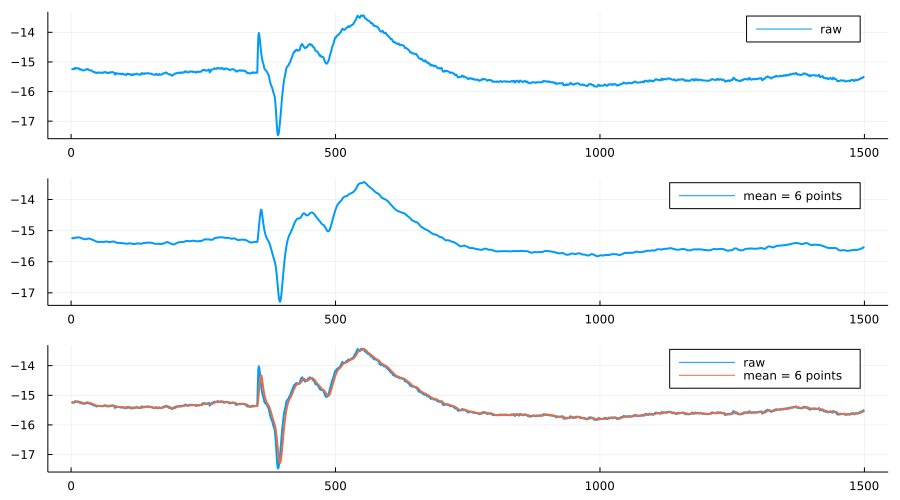

In [112]:
P = plot( [ X1 ], wsize = ( 900, 400 ), line=2, lab = "raw" )
Q = plot( [ X3 ], wsize = ( 900, 400 ), line=2, lab = "mean = $windsize points" );
plot(P,Q, R, layout = (3,1), wsize=(900,500))

In [113]:
savefig("ejemplo_suave.png")

In [ ]:


# #plot( [ΔV, dΔV], wsize = ( 900, 400 ), lab = :none, xlims=(0,1000))

# plot(ΔV, wsize=(900,400), xlims=(0,1000))

# ΔV = diff(sweep);

# hline!([donoho(ΔV)*10])
# #vline!([findall(ΔV .>= donoho(ΔV)*10)])

segmento2 = sweep[x1+ms2frames(1,fs):x1+ms2frames(5,fs)];
y4 = minimum(segmento2);
x4 = x1+ms2frames(1,fs)+findall(segmento2 .== y4)[1];
vline!([ x1 ], lab="inicio")
vline!([ x1 + ms2frames( 1, fs ) ], lab = "inicio del artefacto")
vline!([ x1 + ms2frames( 5, fs ) ], lab = "fin del artefacto")
hline!([ median( sweep[ 1:x1 ] ) ], lab = "basal" )
scatter!( ( x4, y4 ), marker = ( :circle, 5 ), c = :orange, lab="4" )

function findlocalmaxima(signal::Vector)
   inds = Int[]
   if length(signal)>1
       if signal[1]>signal[2]
           push!(inds,1)
       end
       for i=2:length(signal)-1
           if signal[i-1]<signal[i]>signal[i+1]
               push!(inds,i)
           end
       end
       if signal[end]>signal[end-1]
           push!(inds,length(signal))
       end
   end
   inds
 end

using Statistics, StatsBase
donoho( x ) =  ( median( abs.( x ) ) / 0.6745 );

# duracion_estimulo
# 1 ms para la subida
# 5 ms para la bajada


"""
    div_ab( n::Int, lo::Int = 1, hi::Int = n )
        Divisores del numero n entre los valores "lo" and "hi", si no estan definidos entonces se toma de 1 a n
    """
function div_ab( n::Int, lo::Int = 1, hi::Int = n )
    ρ = collect( 1:floor( Int, sqrt( n ) ) ) ; # los numeros de 1 en 1 de la raiz cuadrada
    σ1 = findall( n.%ρ .== 0 ); # divisores de la raiz cuadrada ( residuo = 0 )
    σ2 = Int.( ( n ) ./ ( σ1 ) ); # Sacar los pares ( de 100, 2-50, 10-10, etc.)
    σ = sort( unique( vcat( σ1, σ2 ) ) ); # remover duplicados, concatenar, ordenar
    aux1 = @isdefined lo;
    aux2 = @isdefined hi;
    if aux1 && aux2
        rn = σ[ findall( hi .>= σ .>= lo ) ];
        if isempty( rn )
            println(" there is no divisors of $n between $lo and $hi" )
        else
            return rn
        end
    else
        return σ
    end
end












art1 = [ ];
art2 = [ ];
for i = 1:size( channels, 2 )
    push!( art1, findall( minimum( diff( channels[ :, i ] ) ) .== diff( channels[ :, i ] ) ) );
    push!( art2, findall( maximum( diff( channels[ :, i ] ) ) .== diff( channels[ :, i ] ) ) );
end

art1 = vcat( art1... );
art1 = mode( art1[ art1 .< ( mean( art1 ) + std( art1 ) ) ] );
art2 = vcat( art2... );
art2 = mode( art2[ art2 .< ( mean( art2 ) + std( art2 ) ) ] );

i = 5;
canal = channels[ :, i ];
pks, vals = findmaxima( canal );
li = 200;
lf = 1000;
begin
    default( titlefont = ( 10, string( "trazo ", i ) ), 
        legendfontsize = 8, guidefont = ( 8, :black ), tickfont = ( 8, :black ), 
        framestyle = :default, grid = false, wsize = ( 800, 350 ),
        ylims = ( floor( minimum( channels[ li:lf, : ] ) ), ceil( maximum( channels[ li:lf, : ] ) ) ),
        xlims=( times[ li ], times[ lf ] ),
        legend = false, line = 2
    )

    F1 = plot( times, canal,  c = :black, ylabel = "mV", xlabel = "sec" );
    F1 = plot!( title = string( "trazo ", i ) );
end
#F1 = vline!( [ times[ art1 + 1 ] ], c = :red, line = 1 ); 
te1 = times[ pks ][ times[ art2 + 1 ] .< times[ pks ] .< times[ art1 + 1 ] ][ 1 ];
ve1 = vals[times[ art2 + 1 ] .< times[ pks ] .< times[ art1 + 1 ] ][ 1 ];
te2 = times[ minimum( canal ) .== canal ][ 1 ];
ve2 = canal[ minimum( canal ) .== canal ][ 1 ];

F1 = scatter!( ( te1, ve1 ), marker = ( :circle, 5 ), c = :red )
F1 = scatter!( ( times[ art2 - 1 ], canal[ art2 - 1 ] ), c = :blue, marker = ( :circle, 5 ) )
F1 = scatter!( ( te2, ve2 ), marker = ( :circle, 5 ), c = :grey )
F1 = vline!( [ times[ art2 - 1 - 10 ]  ], c = :orange, line = 1 )
F1 = vline!( [ times[ regreso_basal[200] .+ I ] ], c = :orange, line = 1 )
F1 = hline!( [ canal[ regreso_basal[200] .+ I ] ], c = :orange, line = 1 )

I = findall( minimum( canal ) .== canal )[ 1 ];
regreso_basal = findall( canal[ art2 - 1 ] .>= canal[ I:end ] );



# plot( 
    
#     F1, F2, F3, F4, F5, F6,
#     layout = ( nchs, 1 ), 
#     ylims = ( floor( minimum( channels[ l1:l2, : ] ) ), ceil( maximum( channels[ l1:l2, : ] ) ) ),
#     wsize = ( 800, 1000 )
# )
# #savefig("ejemplo.png")


# using RollingFunctions

# result = rollmean( X, factor);
# result = runmean( X, factor);
# result = runmean( X, factor);





b






# -------------------------------------------------------------------------------------------------------- #
# version 1

prnfile = "/home/isabel/Dropbox/Proyectos/Externos/Luis/PS.prn";

using Plots
using StatsBase

using Peaks

f = open( prnfile ); data = readlines( f );

data = replace.( data, "\t" => " " ); data = replace.( data, "time " => "" );
data = split.( data, " " ); data = hcat( data... );
data = parse.( Float64, data ); data = Array( data' );

times = data[ :, 1 ]; nchs = size( data, 2 ) - 1; channels = data[ :, 2:7 ];

fs = length( times )/( maximum( times ) - minimum( times ) );

# -------------------------------------------------------------------------------------------------------- #